In [65]:
import io
import zipfile
import pickle
from urllib.request import urlopen
from urllib.parse import urlparse

import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [66]:
def fetch_speeches(years):
    paths = ['https://bis.org/speeches/speeches_' + str(year) + '.zip' for year in years]
    speeches = pd.DataFrame()

    for path in paths:
        remotezip = urlopen(path) # read the zip file as a string
        zipinmemory = io.BytesIO(remotezip.read()) # convert from a string to bytes
        zip = zipfile.ZipFile(zipinmemory) # pass the bytes to python's zipfile handler
        
        # read the excel spreadsheet
        xlsx_path = zip.namelist()[0] # get the name of the excel file
        with zip.open(xlsx_path) as f:
            data = pd.read_csv(f)
        speeches = pd.concat([speeches, data])
    return speeches

years = [1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
        2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
        2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
data = fetch_speeches(years)

In [67]:
with open('parameters.pkl', 'rb') as f:
    parameters = pickle.load(f)

In [68]:
data[0:2]

,url,title,description,date,text,author
0,https://www.bis.org/review/r970512a.pdf,Mr. Meyer discusses the economic outlook and t...,"Remarks by Mr. Laurence H. Meyer, a member of ...",1997-04-24 00:00:00,Mr. Meyer discusses the economic outlook and t...,Laurence H Meyer
1,https://www.bis.org/review/r970605b.pdf,Mr. Heikensten looks at the intellectual frame...,Address by the Deputy Governor of the Bank of ...,1997-05-26 00:00:00,Mr. Heikensten looks at the intellectual frame...,Lars Heikensten


In [69]:
def summation_score(classifier, weight):
   classifier[classifier > 0] *= weight
   try:
      score = sum(classifier) / len(classifier)
      return score
   except:
      return np.nan

scores = pd.DataFrame()
final_score = []
ids = []

weight = 3

for key in tqdm(parameters.keys()):
   ids.append(key)
   final_score.append( summation_score(np.array(parameters[key]), weight) )

scores['id'] = ids
scores['climatebert_scores'] = final_score

100%|██████████| 19160/19160 [00:00<00:00, 62729.92it/s]


In [70]:
import os

data['id'] = [os.path.basename(urlparse(url).path).split('.')[0] for url in data['url']]
data = pd.merge(data, scores, on='id')

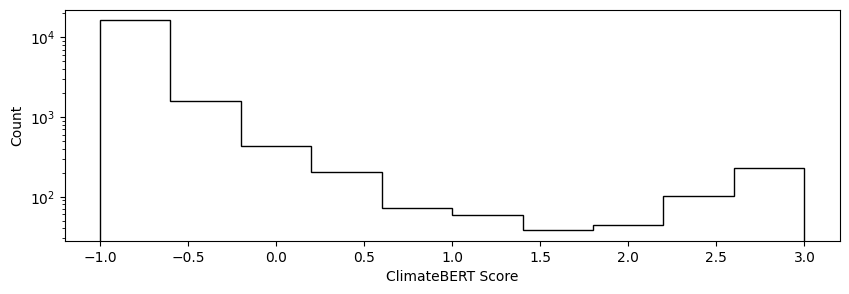

In [76]:
plt.figure(figsize=(10,3))
plt.hist(data['climatebert_scores'], color = 'k', histtype='step')
plt.xlabel('ClimateBERT Score')
plt.ylabel('Count')
plt.yscale('log')

In [77]:
data.to_csv('all_data.csv')

In [79]:
climate_speeches = data[data['climatebert_scores'] > 1.5]
print(len(climate_speeches))

404


In [80]:
climate_speeches.head()

,url,title,description,date,text,author,id,climatebert_scores
712,https://www.bis.org/review/r001129c.pdf,Environmental issues and their implications fo...,"Keynote Speech by Mr David Carse, Deputy Chief...",2000-11-29 00:00:00,David Carse: Environmental issues and their im...,David Carse,r001129c,3.000000
1125,https://www.bis.org/review/r010629a.pdf,Alan Greenspan: Impact of energy on the economy,"Remarks by Mr Alan Greenspan, Chairman of the ...",2001-06-28 00:00:00,Alan Greenspan: Impact of energy on the econom...,Alan Greenspan,r010629a,2.555556
2003,https://www.bis.org/review/r041229a.pdf,Jean-Pierre Roth: International monetary polic...,"Summary of a speech by Mr Jean Pierre Roth, Ch...",2004-12-06 00:00:00,Jean-Pierre Roth: International monetary polic...,Jean-Pierre Roth,r041229a,3.000000
2006,https://www.bis.org/review/r041223g.pdf,Caleb M Fundanga: Economic and environmental g...,"Speech by Dr Caleb M Fundanga, Governor of the...",2004-11-03 00:00:00,Caleb M Fundanga: Economic and environmental g...,Caleb M Fundanga,r041223g,2.906977
2055,https://www.bis.org/review/r041122c.pdf,Philipp M Hildebrand: Monetary policy and oil ...,"Speech by Mr Philipp M Hildebrand, Member of t...",2004-11-18 00:00:00,Philipp M Hildebrand: Monetary policy and oil ...,Philipp Hildebrand,r041122c,1.576271


In [81]:
parameters['r041122c']

array([ 1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1, -1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1])

In [75]:
climate_speeches[['url', 'climatebert_scores']]

,url,climatebert_scores
712,https://www.bis.org/review/r001129c.pdf,3.000000
1125,https://www.bis.org/review/r010629a.pdf,2.555556
1912,https://www.bis.org/review/r030314e.pdf,1.333333
2003,https://www.bis.org/review/r041229a.pdf,3.000000
2006,https://www.bis.org/review/r041223g.pdf,2.906977
...,...,...
19105,https://www.bis.org/review/r240604c.htm,2.809524
19128,https://www.bis.org/review/r240619e.htm,3.000000
19138,https://www.bis.org/review/r240617d.htm,1.434783
19141,https://www.bis.org/review/r240621h.htm,2.230769
